<a href="https://colab.research.google.com/github/shrutikamokashi/Covid19_Projects/blob/master/Covid_19_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [ ]:
state_wise = pd.read_csv('state_wise.csv')
Hospitals_and_Beds_statewise = pd.read_csv('Hospitals_and_Beds_statewise.csv')
vaccine_data_statewise = pd.read_excel('vaccine_data_statewise.xlsx',sheet_name='Sheet1')

In [ ]:
vaccine_data_statewise.head()
grouped_df = vaccine_data_statewise.groupby("State")
maximums = grouped_df.max()
maximums = maximums.reset_index()
maximums

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,Andaman and Nicobar Islands,111506.0,5655.0,48.0,111506.0,15207.0,60106.0,51391.0,9.0,0.0,126713.0,0.0,3.0,20079.0,60724.0,30700.0,126713
1,Andhra Pradesh,8141170.0,1263236.0,5022.0,8141170.0,2567240.0,4135672.0,4004213.0,1285.0,1925318.0,8782234.0,858.0,330.0,1196111.0,4224056.0,2719400.0,10708410
2,Arunachal Pradesh,284334.0,22909.0,213.0,284334.0,78575.0,158149.0,126082.0,103.0,141.0,362909.0,0.0,268.0,115077.0,121802.0,47415.0,362909
3,Assam,3429205.0,328720.0,2338.0,3429205.0,845276.0,1861437.0,1567215.0,553.0,840957.0,3433524.0,0.0,182.0,998273.0,1593052.0,837523.0,4274481
4,Bihar,8941673.0,797962.0,3164.0,8941673.0,1830579.0,4919926.0,4020049.0,1698.0,891581.0,9880671.0,0.0,196.0,2543344.0,3080223.0,3315420.0,10772252
5,Chandigarh,297146.0,17087.0,80.0,297146.0,75045.0,167099.0,130005.0,42.0,69.0,372191.0,0.0,134.0,98731.0,121078.0,77238.0,372191
6,Chhattisgarh,5148601.0,516285.0,3982.0,5148601.0,1125803.0,2517333.0,2630693.0,575.0,203908.0,6070496.0,0.0,564.0,465122.0,2932593.0,1750527.0,6274404
7,Dadra and Nagar Haveli and Daman and Diu,189765.0,15320.0,94.0,189765.0,26037.0,121264.0,68467.0,34.0,0.0,215802.0,0.0,87.0,114126.0,54808.0,20742.0,215802
8,Delhi,4329324.0,189776.0,1043.0,4329324.0,1269730.0,2511391.0,1817070.0,863.0,1693027.0,3906027.0,0.0,948.0,1621602.0,1674796.0,1029861.0,5599054
9,Goa,456053.0,40572.0,184.0,456053.0,95935.0,234900.0,221113.0,40.0,9573.0,542415.0,0.0,567.0,115716.0,188466.0,151818.0,551988


In [ ]:
state_wise.drop('State_Notes', axis=1, inplace=True)
state_wise.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths
0,Andaman and Nicobar Islands,7105,6876,122,107,5/6/2021 23:19,0,AN,17,24,1
1,Andhra Pradesh,1749363,1609879,11376,128108,5/6/2021 18:40,0,AP,10373,15958,80
2,Arunachal Pradesh,29113,25237,123,3753,5/6/2021 23:19,0,AR,327,402,1
3,Assam,432714,376343,3621,51403,5/6/2021 23:19,1347,AS,3781,3099,44
4,Bihar,712197,697229,5340,9627,5/6/2021 22:02,1,BR,1007,1667,21


In [ ]:
Hospitals_and_Beds_statewise.rename(columns={'Unnamed: 0': 'State', 'Unnamed: 6': 'Unnamed'}, inplace=True)
Hospitals_and_Beds_statewise.drop('Unnamed', axis=1, inplace=True)

In [ ]:
Hospitals_and_Beds_statewise

,State,PHC,CHC,SDH,DH,Total
0,Andaman & Nicobar Islands,27,4,NaN,3,34
1,Andhra Pradesh,1417,198,31,20,1666
2,Arunachal Pradesh,122,62,NaN,15,199
3,Assam,1007,166,14,33,1220
4,Bihar,2007,63,33,43,2146
5,Chandigarh,40,2,1,4,47
6,Chhattisgarh,813,166,12,32,1023
7,Dadra & Nagar Haveli,9,2,1,1,13
8,Daman & Diu,4,2,NaN,2,8
9,Delhi,534,25,9,47,615


In [ ]:
df = pd.merge(state_wise, maximums, on=["State"])
df.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,Andaman and Nicobar Islands,7105,6876,122,107,5/6/2021 23:19,0,AN,17,24,1,111506.0,5655.0,48.0,111506.0,15207.0,60106.0,51391.0,9.0,0.0,126713.0,0.0,3.0,20079.0,60724.0,30700.0,126713
1,Andhra Pradesh,1749363,1609879,11376,128108,5/6/2021 18:40,0,AP,10373,15958,80,8141170.0,1263236.0,5022.0,8141170.0,2567240.0,4135672.0,4004213.0,1285.0,1925318.0,8782234.0,858.0,330.0,1196111.0,4224056.0,2719400.0,10708410
2,Arunachal Pradesh,29113,25237,123,3753,5/6/2021 23:19,0,AR,327,402,1,284334.0,22909.0,213.0,284334.0,78575.0,158149.0,126082.0,103.0,141.0,362909.0,0.0,268.0,115077.0,121802.0,47415.0,362909
3,Assam,432714,376343,3621,51403,5/6/2021 23:19,1347,AS,3781,3099,44,3429205.0,328720.0,2338.0,3429205.0,845276.0,1861437.0,1567215.0,553.0,840957.0,3433524.0,0.0,182.0,998273.0,1593052.0,837523.0,4274481
4,Bihar,712197,697229,5340,9627,5/6/2021 22:02,1,BR,1007,1667,21,8941673.0,797962.0,3164.0,8941673.0,1830579.0,4919926.0,4020049.0,1698.0,891581.0,9880671.0,0.0,196.0,2543344.0,3080223.0,3315420.0,10772252


In [ ]:
result = pd.merge(df, Hospitals_and_Beds_statewise, on=["State"])
result

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,PHC,CHC,SDH,DH,Total
0,Andhra Pradesh,1749363,1609879,11376,128108,5/6/2021 18:40,0,AP,10373,15958,80,8141170.0,1263236.0,5022.0,8141170.0,2567240.0,4135672.0,4004213.0,1285.0,1925318.0,8782234.0,858.0,330.0,1196111.0,4224056.0,2719400.0,10708410,1417,198,31,20,1666
1,Arunachal Pradesh,29113,25237,123,3753,5/6/2021 23:19,0,AR,327,402,1,284334.0,22909.0,213.0,284334.0,78575.0,158149.0,126082.0,103.0,141.0,362909.0,0.0,268.0,115077.0,121802.0,47415.0,362909,122,62,NaN,15,199
2,Assam,432714,376343,3621,51403,5/6/2021 23:19,1347,AS,3781,3099,44,3429205.0,328720.0,2338.0,3429205.0,845276.0,1861437.0,1567215.0,553.0,840957.0,3433524.0,0.0,182.0,998273.0,1593052.0,837523.0,4274481,1007,166,14,33,1220
3,Bihar,712197,697229,5340,9627,5/6/2021 22:02,1,BR,1007,1667,21,8941673.0,797962.0,3164.0,8941673.0,1830579.0,4919926.0,4020049.0,1698.0,891581.0,9880671.0,0.0,196.0,2543344.0,3080223.0,3315420.0,10772252,2007,63,33,43,2146
4,Chandigarh,60585,58892,768,925,5/6/2021 20:00,0,CH,98,175,3,297146.0,17087.0,80.0,297146.0,75045.0,167099.0,130005.0,42.0,69.0,372191.0,0.0,134.0,98731.0,121078.0,77238.0,372191,40,2,1,4,47
5,Chhattisgarh,979576,941489,13192,24895,5/6/2021 23:19,0,CT,1356,3408,30,5148601.0,516285.0,3982.0,5148601.0,1125803.0,2517333.0,2630693.0,575.0,203908.0,6070496.0,0.0,564.0,465122.0,2932593.0,1750527.0,6274404,813,166,12,32,1023
6,Delhi,1428863,1397575,24557,6731,5/6/2021 16:40,0,DL,414,1683,60,4329324.0,189776.0,1043.0,4329324.0,1269730.0,2511391.0,1817070.0,863.0,1693027.0,3906027.0,0.0,948.0,1621602.0,1674796.0,1029861.0,5599054,534,25,9,47,615
7,Goa,158990,148030,2744,8216,5/6/2021 18:40,0,GA,567,1433,17,456053.0,40572.0,184.0,456053.0,95935.0,234900.0,221113.0,40.0,9573.0,542415.0,0.0,567.0,115716.0,188466.0,151818.0,551988,31,4,2,3,40
8,Gujarat,814390,782374,9906,22110,4/6/2021 23:28,0,GJ,0,0,0,13674583.0,1057645.0,7218.0,13674583.0,4261488.0,7358698.0,6314033.0,1852.0,2132268.0,15803803.0,0.0,1002.0,3625807.0,5665388.0,4380386.0,17936071,1770,385,44,37,2236
9,Haryana,761637,742999,8664,9974,5/6/2021 22:02,0,HR,723,1744,59,5151851.0,342645.0,2345.0,5151851.0,1014174.0,2803632.0,2347301.0,918.0,894223.0,5271802.0,0.0,866.0,1568379.0,1830032.0,1748859.0,6166025,500,131,24,28,683


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                32 non-null     object 
 1   Confirmed                            32 non-null     int64  
 2   Recovered                            32 non-null     int64  
 3   Deaths                               32 non-null     int64  
 4   Active                               32 non-null     int64  
 5   Last_Updated_Time                    32 non-null     object 
 6   Migrated_Other                       32 non-null     int64  
 7   State_code                           32 non-null     object 
 8   Delta_Confirmed                      32 non-null     int64  
 9   Delta_Recovered                      32 non-null     int64  
 10  Delta_Deaths                         32 non-null     int64  
 11  Total Individuals Vaccinated      

In [ ]:
result.isna().sum()

State                                  0
Confirmed                              0
Recovered                              0
Deaths                                 0
Active                                 0
Last_Updated_Time                      0
Migrated_Other                         0
State_code                             0
Delta_Confirmed                        0
Delta_Recovered                        0
Delta_Deaths                           0
Total Individuals Vaccinated           0
Total Sessions Conducted               0
Total Sites                            0
First Dose Administered                0
Second Dose Administered               0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Covaxin Administered             0
Total CoviShield Administered          0
Total Sputnik V Administered           0
AEFI                                   0
18-45 years (Age)                      0
45-60 years (Age

In [ ]:
result.replace(np.nan, 0, inplace=True)

In [ ]:
result['PHC'] = result['PHC'].astype(int)
result['CHC'] = result['CHC'].astype(int)
result['SDH'] = result['SDH'].astype(int)
result['DH'] = result['DH'].astype(int)
result['Total'] = result['Total'].astype(int)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                32 non-null     object 
 1   Confirmed                            32 non-null     int64  
 2   Recovered                            32 non-null     int64  
 3   Deaths                               32 non-null     int64  
 4   Active                               32 non-null     int64  
 5   Last_Updated_Time                    32 non-null     object 
 6   Migrated_Other                       32 non-null     int64  
 7   State_code                           32 non-null     object 
 8   Delta_Confirmed                      32 non-null     int64  
 9   Delta_Recovered                      32 non-null     int64  
 10  Delta_Deaths                         32 non-null     int64  
 11  Total Individuals Vaccinated      

In [ ]:
result.describe()

,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,PHC,CHC,SDH,DH,Total
count,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000
mean,8.896668e+05,8.333608e+05,10697.000000,45249.125000,359.812500,3423.343750,5578.125000,79.562500,5.496812e+06,4.768274e+05,2726.875000,5.496812e+06,1.368654e+06,2.948647e+06,2.547262e+06,903.187500,7.977122e+05,6.067303e+06,484.875000,665.687500,1.307292e+06,2.318294e+06,1.869328e+06,6.865466e+06,911.156250,171.031250,39.187500,30.250000,1151.625000
std,1.185309e+06,1.112406e+06,18252.346674,73409.229674,1161.622209,5707.601251,8830.660333,157.744166,5.395166e+06,4.797205e+05,2673.271811,5.395166e+06,1.391337e+06,2.926392e+06,2.479782e+06,940.283706,8.474012e+05,5.980419e+06,2587.273602,852.098716,1.320581e+06,2.269739e+06,1.914272e+06,6.753824e+06,925.600977,182.386595,60.706293,31.691049,1142.887987
min,8.667000e+03,7.437000e+03,38.000000,925.000000,0.000000,0.000000,0.000000,0.000000,3.037800e+04,1.381000e+04,19.000000,3.037800e+04,6.964000e+03,1.676900e+04,1.360700e+04,4.000000,7.000000e+00,3.734200e+04,0.000000,0.000000,1.024300e+04,1.287800e+04,7.257000e+03,3.734200e+04,4.000000,2.000000,0.000000,1.000000,10.000000
25%,5.908300e+04,5.606975e+04,846.000000,6649.250000,0.000000,322.500000,372.250000,5.500000,4.093448e+05,3.862900e+04,263.000000,4.093448e+05,7.769250e+04,2.238940e+05,1.898488e+05,87.750000,1.955000e+02,4.810510e+05,0.000000,170.000000,1.379310e+05,1.748890e+05,9.049725e+04,4.810510e+05,120.000000,21.750000,2.000000,10.500000,163.750000
50%,5.829265e+05,5.460385e+05,5187.000000,10659.000000,0.000000,717.500000,1675.000000,20.000000,4.174867e+06,3.246630e+05,2162.500000,4.174867e+06,9.297250e+05,2.391328e+06,1.782872e+06,571.500000,6.758205e+05,4.126840e+06,0.000000,355.000000,9.820600e+05,1.700248e+06,1.294684e+06,5.204150e+06,527.500000,106.500000,16.500000,25.500000,712.500000
75%,1.089464e+06,1.045751e+06,11830.000000,33016.250000,23.000000,2497.750000,3908.000000,59.250000,8.341296e+06,8.653668e+05,4518.000000,8.341296e+06,2.098952e+06,4.447069e+06,4.049879e+06,1388.250000,1.552072e+06,9.424430e+06,0.000000,759.500000,2.603960e+06,3.330970e+06,3.165951e+06,1.072437e+07,1417.750000,252.750000,50.500000,38.250000,1876.500000
max,5.819224e+06,5.528834e+06,99512.000000,268275.000000,5950.000000,21410.000000,32472.000000,741.000000,1.895940e+07,1.616711e+06,9947.000000,1.895940e+07,4.728102e+06,1.017129e+07,8.785443e+06,3963.000000,2.901616e+06,2.078588e+07,14639.000000,3970.000000,4.181737e+06,8.320220e+06,6.880500e+06,2.368750e+07,3277.000000,671.000000,310.000000,174.000000,4122.000000


In [ ]:
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f}M'.format(x*1e-6)
formatter = FuncFormatter(millions)


In [ ]:
def add_value_labels(ax, typ, spacing=10):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='left', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            #y_value.apply(lambda x: '${:,.2f}MM'.format(x))
            label = "{:,}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='left', va=va) 

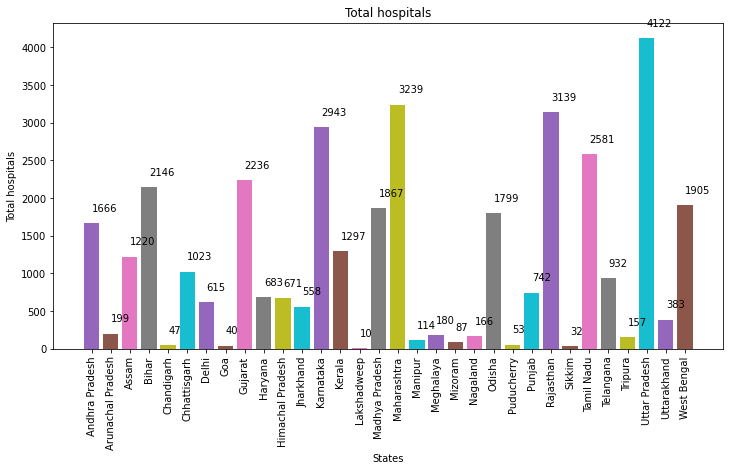

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(12,6))

x = result['State'].astype(str)
y1= result['Total']
# Use automatic FuncFormatter creation
#ax.yaxis.set_major_formatter(formatter)
ax.bar(x,y1, color=['C4','C5','C6','C7','C8','C9'])
add_value_labels(ax,typ='bar')
plt.xticks(rotation=90)
plt.title("Total hospitals")
plt.xlabel("States")
plt.ylabel("Total hospitals")
plt.show()


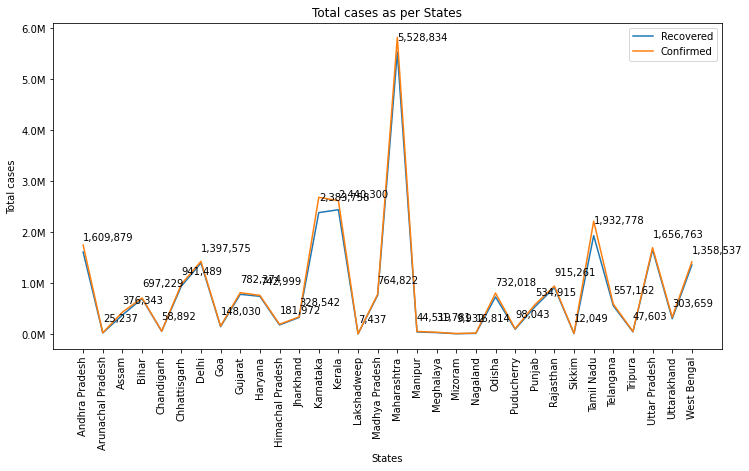

In [ ]:
import matplotlib.ticker as ticker

# create data
x = result['State']
y1 = result['Recovered'] 
y2 = result['Confirmed'] 

fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_major_formatter(formatter)
  
# plot lines
plt.plot(x, y1, label = "Recovered")
plt.plot(x, y2, label = "Confirmed")
plt.legend()
plt.title("Total cases as per States")
plt.xlabel("States")
plt.ylabel("Total cases")
plt.xticks(rotation=90)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
add_value_labels(ax, typ='line')
plt.show()

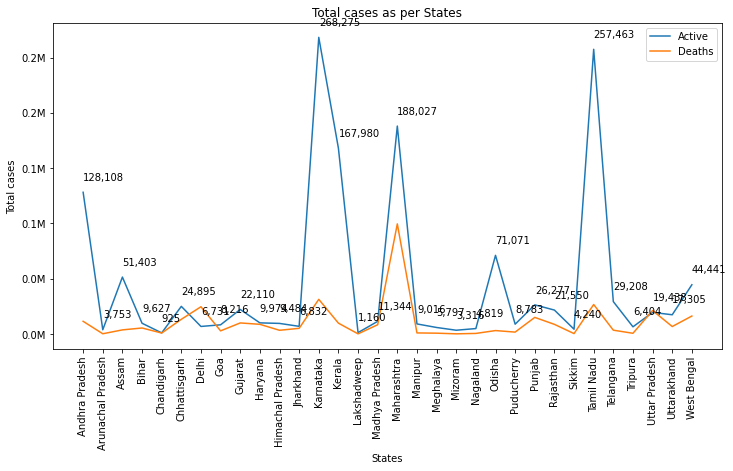

In [ ]:

# create data
x = result['State']
y1 = result['Active'] 
y2 = result['Deaths'] 

fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_major_formatter(formatter)
  
# plot lines
plt.plot(x, y1, label = "Active")
plt.plot(x, y2, label = "Deaths")
plt.title("Total cases as per States")
plt.xlabel("States")
plt.ylabel("Total cases")

plt.legend()
plt.xticks(rotation=90)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
add_value_labels(ax, typ='line')
plt.show()

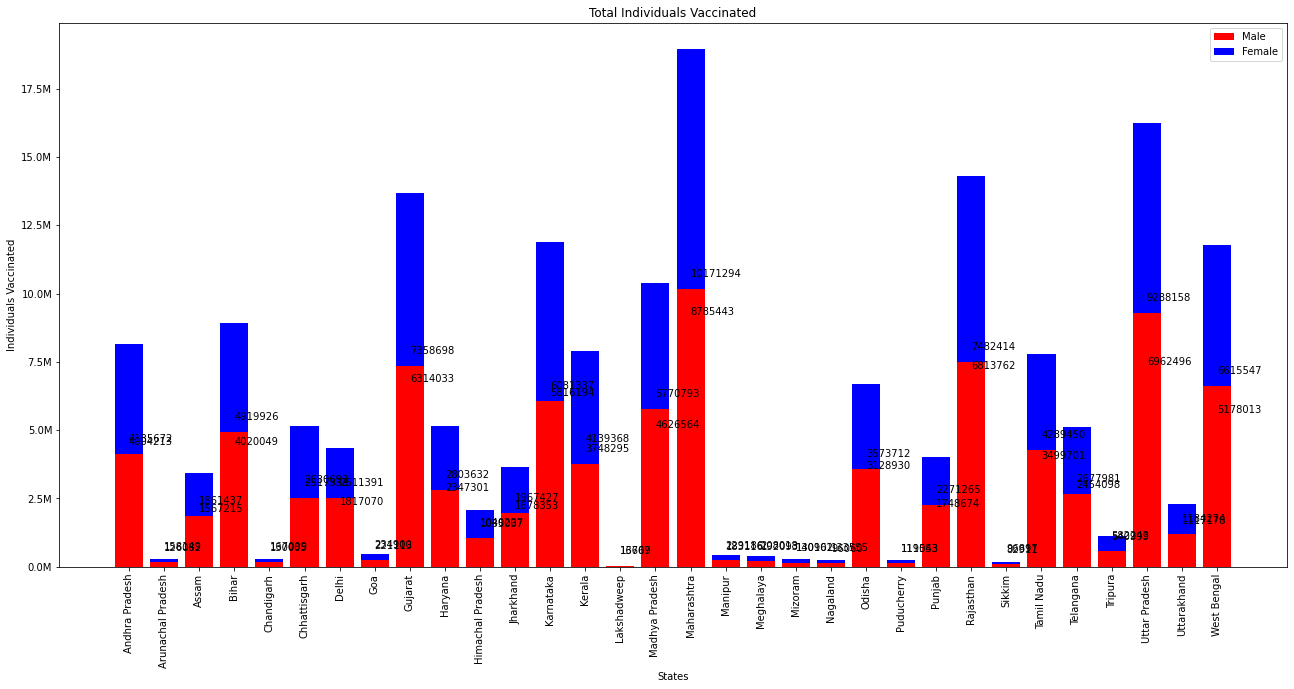

In [ ]:
# create data
x = result['State']
y1 = result['Male(Individuals Vaccinated)'] 
y2 = result['Female(Individuals Vaccinated)'] 
fig, ax = plt.subplots(figsize=(22,10))
ax.yaxis.set_major_formatter(formatter)
ax.bar(x,y1, color=['red'])
ax.bar(x,y2, bottom=y1, color=['blue'])
add_value_labels(ax, typ='bar')
plt.xticks(rotation=90)
plt.title("Total Individuals Vaccinated")
plt.legend(["Male", "Female","Transgender"])

plt.xlabel("States")
plt.ylabel("Individuals Vaccinated")
plt.show()

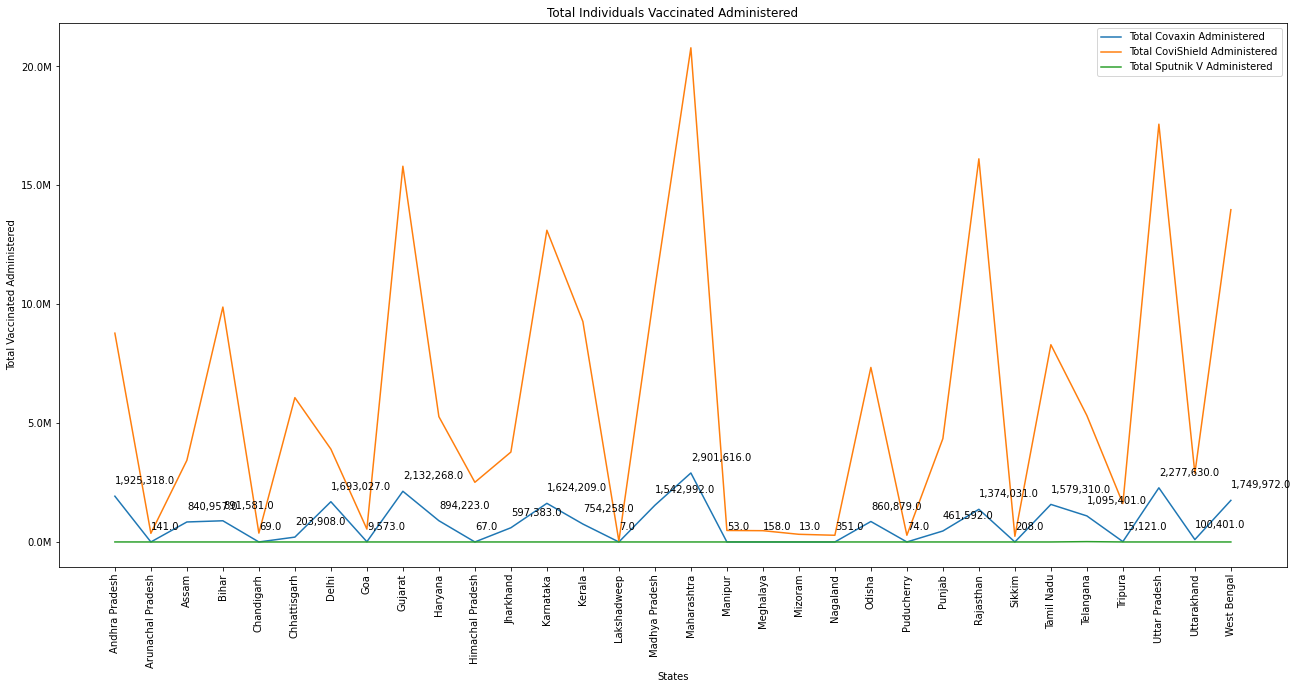

In [ ]:
# create data
x = result['State']
y1 = result['Total Covaxin Administered'] 
y2 = result['Total CoviShield Administered'] 
y3 = result['Total Sputnik V Administered'] 

fig, ax = plt.subplots(figsize=(22,10))
ax.yaxis.set_major_formatter(formatter)
  
# plot lines
plt.plot(x, y1, label = "Total Covaxin Administered")
plt.plot(x, y2, label = "Total CoviShield Administered")
plt.plot(x, y3, label = "Total Sputnik V Administered")
plt.legend()
plt.xticks(rotation=90)
plt.legend(["Total Covaxin Administered","Total CoviShield Administered", "Total Sputnik V Administered"])
plt.title("Total Individuals Vaccinated Administered")
plt.xlabel("States")
plt.ylabel("Total Vaccinated Administered")

add_value_labels(ax, typ='line')
plt.show()

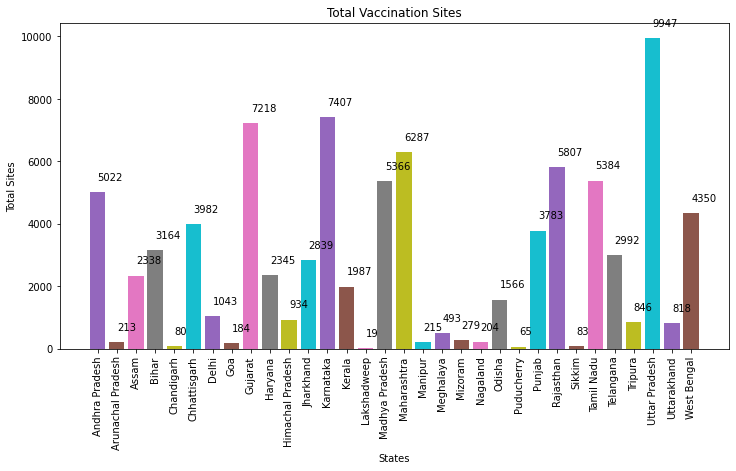

In [ ]:
from matplotlib.ticker import FuncFormatter


fig, ax = plt.subplots(figsize=(12,6))

x = result['State'].astype(str)
y1 = result['Total Sites ']
# Use automatic FuncFormatter creation
#ax.yaxis.set_major_formatter(formatter)
ax.bar(x,y1, color=['C4','C5','C6','C7','C8','C9'])
add_value_labels(ax,typ='bar')
plt.xticks(rotation=90)
plt.title("Total Vaccination Sites")
plt.xlabel("States")
plt.ylabel("Total Sites")
plt.show()


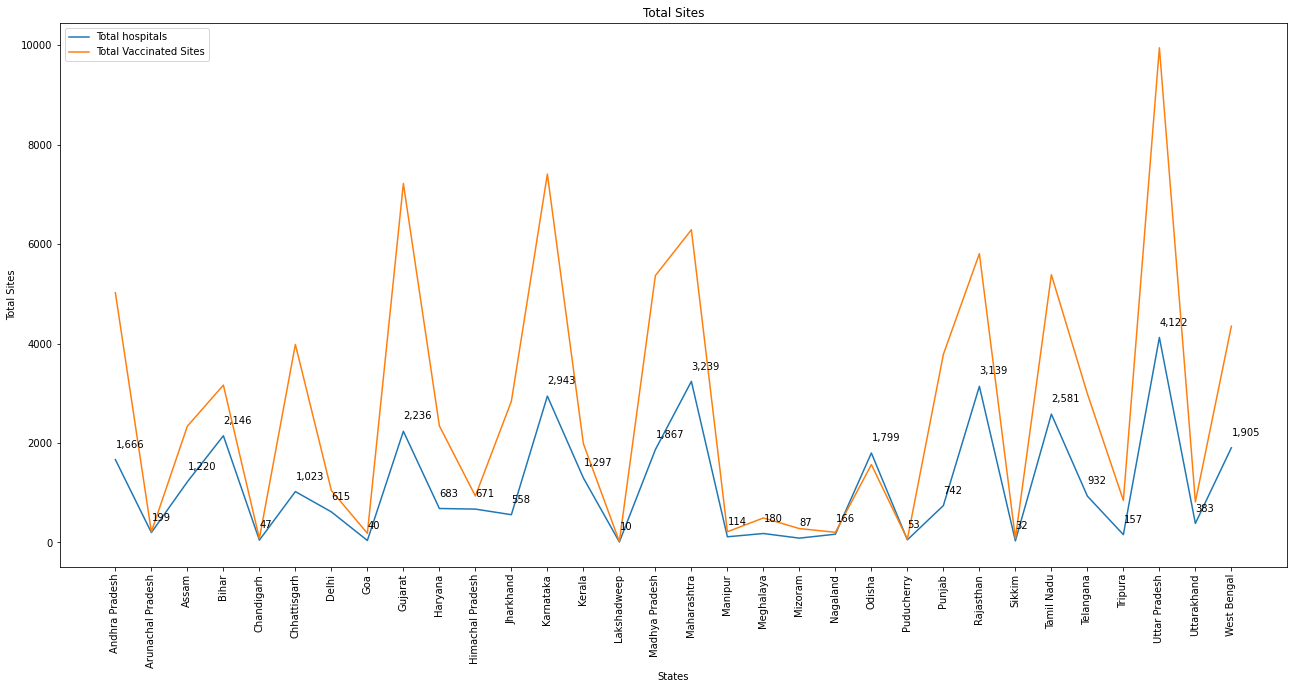

In [ ]:
# create data
x = result['State']
y1 = result['Total'] 
y2 = result['Total Sites '] 

fig, ax = plt.subplots(figsize=(22,10))
# plot lines
plt.plot(x, y1, label = "Total hospitals")
plt.plot(x, y2, label = "Total Vaccinated Sites")
plt.legend()
plt.xticks(rotation=90)
plt.legend(["Total hospitals", "Total Vaccinated Sites"])
plt.title("Total Sites")
plt.xlabel("States")
plt.ylabel("Total Sites")

add_value_labels(ax, typ='line')
plt.show()

In [ ]:
final = result[['State','Confirmed','Recovered','Deaths','Active','Total Sites ','Total','Total Individuals Vaccinated']]
final

,State,Confirmed,Recovered,Deaths,Active,Total Sites,Total,Total Individuals Vaccinated
0,Andhra Pradesh,1749363,1609879,11376,128108,5022.0,1666,8141170.0
1,Arunachal Pradesh,29113,25237,123,3753,213.0,199,284334.0
2,Assam,432714,376343,3621,51403,2338.0,1220,3429205.0
3,Bihar,712197,697229,5340,9627,3164.0,2146,8941673.0
4,Chandigarh,60585,58892,768,925,80.0,47,297146.0
5,Chhattisgarh,979576,941489,13192,24895,3982.0,1023,5148601.0
6,Delhi,1428863,1397575,24557,6731,1043.0,615,4329324.0
7,Goa,158990,148030,2744,8216,184.0,40,456053.0
8,Gujarat,814390,782374,9906,22110,7218.0,2236,13674583.0
9,Haryana,761637,742999,8664,9974,2345.0,683,5151851.0


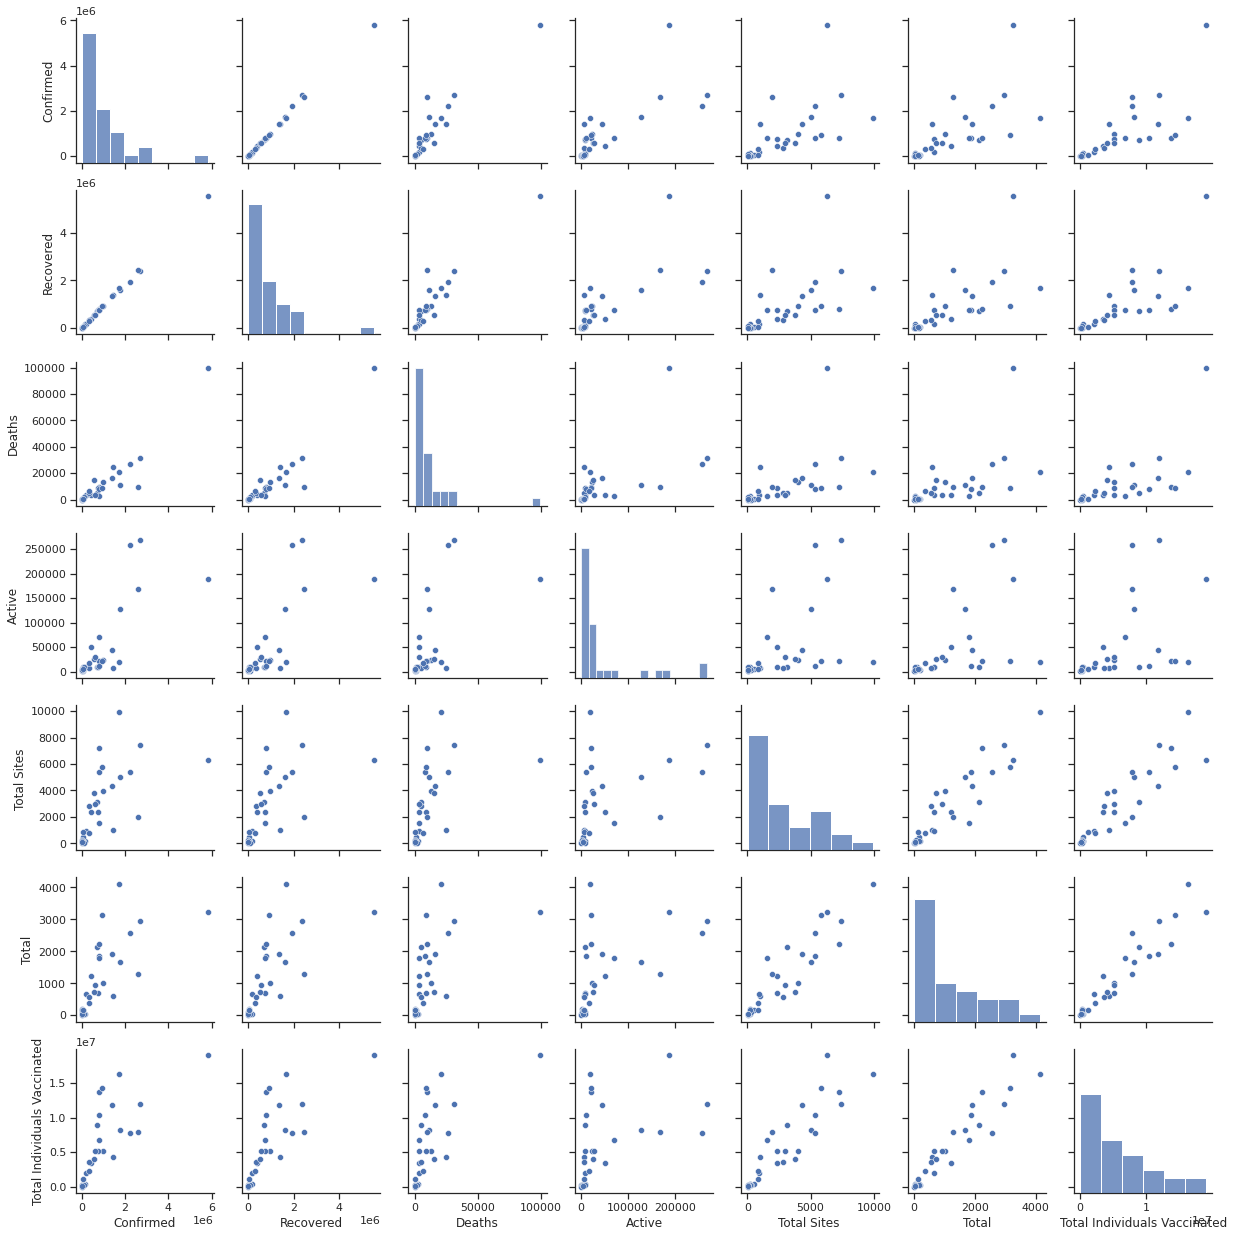

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(final)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


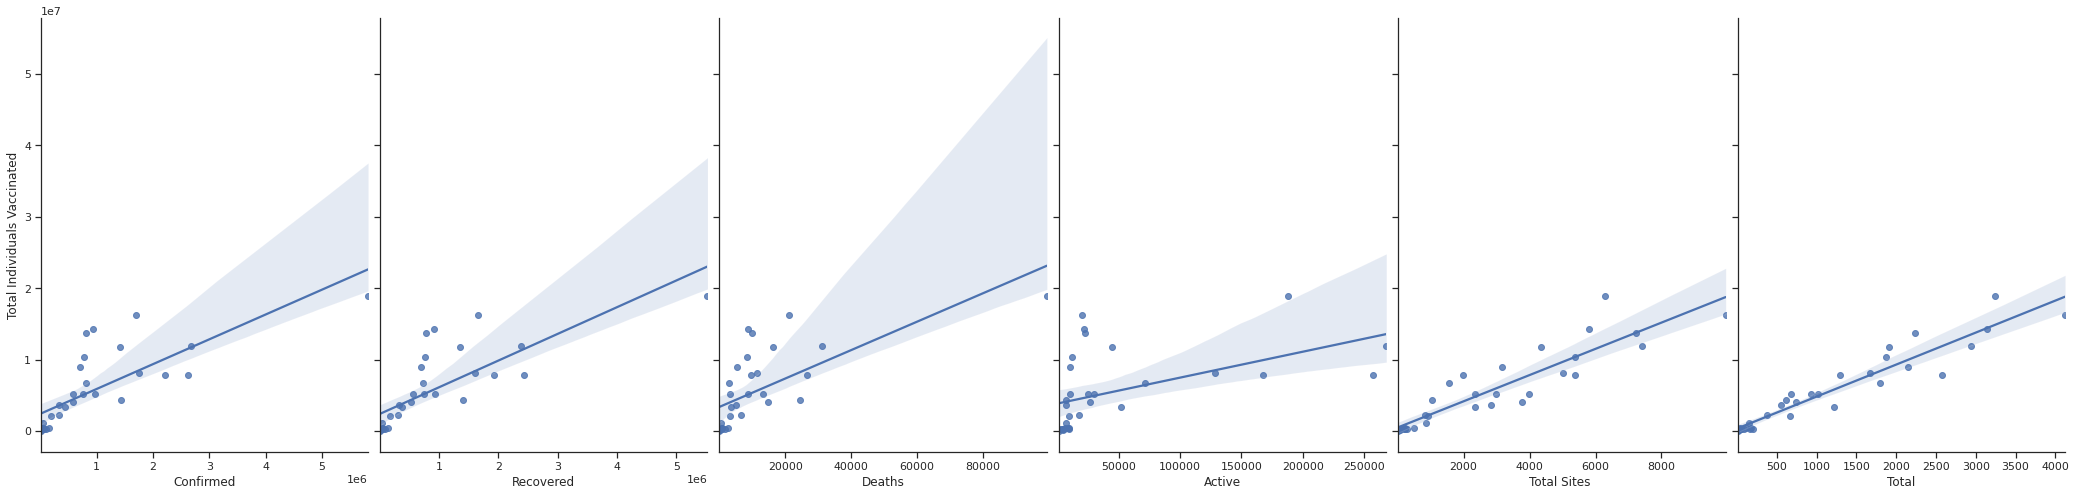

In [ ]:
sns.pairplot(final, x_vars=['Confirmed','Recovered','Deaths','Active','Total Sites ','Total'], y_vars='Total Individuals Vaccinated', size=7, aspect=0.7, kind='reg')

plt.show()

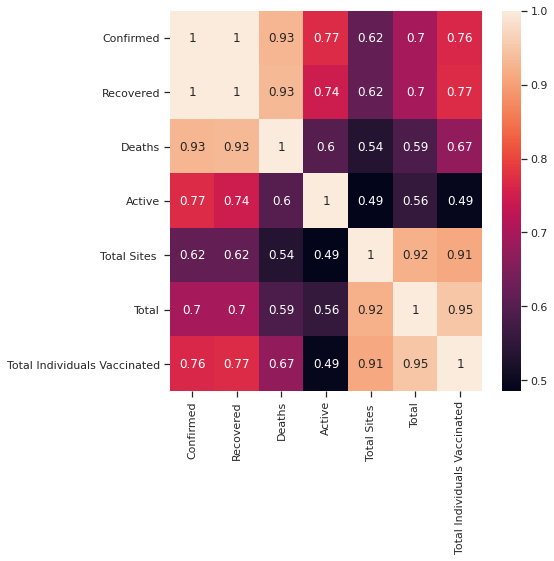

In [ ]:

corrMatrix = final.corr()
fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
X = final[['Confirmed','Recovered','Deaths','Active','Total Sites ','Total']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = final['Total Individuals Vaccinated']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 238379.96814650297
Coefficients: 
 [ 101.76887474  -98.73314011 -204.95216381 -120.50271397  637.06153233
 2495.39197424]


In [ ]:
# Predicting a new result with Linear Regression
pred = model.predict(X_test)
print(pred)

[ 3789378.43995611   378703.31744333  2548204.03670494  4715165.96358897
 15609933.27296638   275619.20094287  1139548.55858823]


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df = pd.DataFrame(list(zip(y_test, pred)),
               columns =['Actual', 'Predicted'])

In [ ]:
df

,Actual,Predicted
0,3646348.00,3789378.44
1,230627.00,378703.32
2,2075616.00,2548204.04
3,3429205.00,4715165.96
4,18959397.00,15609933.27
5,30378.00,275619.20
6,1123405.00,1139548.56


In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Mean squared error: 1885532924955.81
Variance score: 0.95


In [ ]:
# calculate MAE, MSE, RMSE
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, pred))
print(metrics.mean_squared_error(y_test, pred))
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

808643.4634654394
1885532924955.8123
1373147.087880906


In [ ]:
from sklearn.linear_model import Lasso

# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X_train, y_train)

pred_lasso = model.predict(X_test)
# summarize prediction
print(pred_lasso)

[ 3815952.89884162   432793.78859061  2595892.08433629  4615784.09767766
 15443161.74241477   324872.73424781  1181155.40664162]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13648200736399.66, tolerance: 62172845912.35281
  positive)


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df1 = pd.DataFrame(list(zip(y_test, pred_lasso)),
               columns =['Actual', 'Predicted'])
df1

,Actual,Predicted
0,3646348.00,3815952.90
1,230627.00,432793.79
2,2075616.00,2595892.08
3,3429205.00,4615784.10
4,18959397.00,15443161.74
5,30378.00,324872.73
6,1123405.00,1181155.41


In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Mean squared error: 2028895290821.48
Variance score: 0.95


In [ ]:
print(metrics.mean_absolute_error(y_test, pred_lasso))
print(metrics.mean_squared_error(y_test, pred_lasso))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

849586.7525601184
2028895290821.4792
1424392.9551993296
